In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
bankruptcy_data = pd.read_csv('/content/data.csv')

In [ ]:
bankruptcy_data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [ ]:
# Print all column names to inspect for hidden characters
print(bankruptcy_data.columns.tolist())

['Bankrupt?', ' ROA(C) before interest and depreciation before interest', ' ROA(A) before interest and % after tax', ' ROA(B) before interest and depreciation after tax', ' Operating Gross Margin', ' Realized Sales Gross Margin', ' Operating Profit Rate', ' Pre-tax net Interest Rate', ' After-tax net Interest Rate', ' Non-industry income and expenditure/revenue', ' Continuous interest rate (after tax)', ' Operating Expense Rate', ' Research and development expense rate', ' Cash flow rate', ' Interest-bearing debt interest rate', ' Tax rate (A)', ' Net Value Per Share (B)', ' Net Value Per Share (A)', ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons', ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)', ' Operating Profit Per Share (Yuan ¥)', ' Per Share Net profit before tax (Yuan ¥)', ' Realized Sales Gross Profit Growth Rate', ' Operating Profit Growth Rate', ' After-tax Net Profit Growth Rate', ' Regular Net Profit Growth Rate', ' Continuous Net Profit Growth 

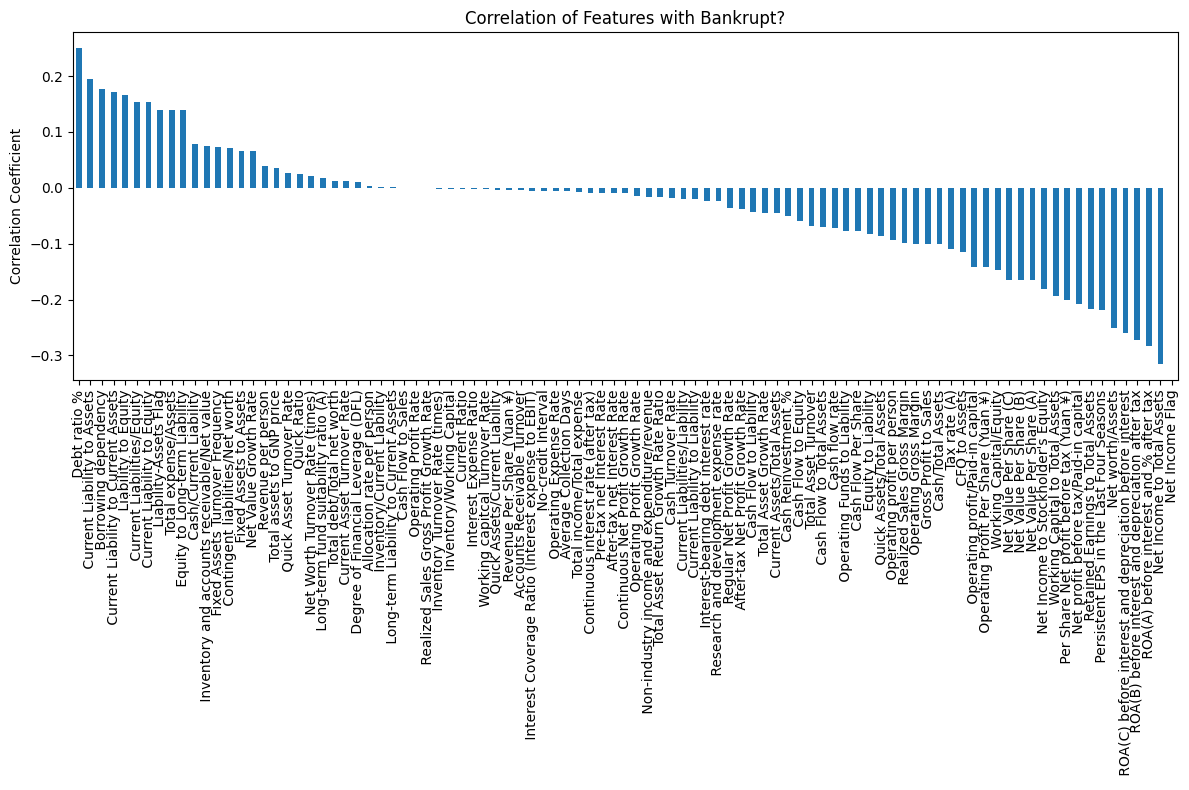

Top 10 Positive Correlations:
Debt ratio %                           0.250161
Current Liability to Assets            0.194494
Borrowing dependency                   0.176543
Current Liability to Current Assets    0.171306
Liability to Equity                    0.166812
Current Liabilities/Equity             0.153828
Current Liability to Equity            0.153828
Liability-Assets Flag                  0.139212
Total expense/Assets                   0.139049
Equity to Long-term Liability          0.139014
Name: Bankrupt?, dtype: float64

Top 10 Negative Correlations:
Per Share Net profit before tax (Yuan ¥)                  -0.201395
Net profit before tax/Paid-in capital                     -0.207857
Retained Earnings to Total Assets                         -0.217779
Persistent EPS in the Last Four Seasons                   -0.219560
Net worth/Assets                                          -0.250161
ROA(C) before interest and depreciation before interest   -0.260807
ROA(B) before inter

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

target_column = 'Bankrupt?'

correlations = bankruptcy_data.corr()[target_column].sort_values(ascending=False)
correlations = correlations.drop(target_column)

plt.figure(figsize=(12, 8))
correlations.plot(kind='bar')
plt.title(f'Correlation of Features with {target_column}')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

print("Top 10 Positive Correlations:")
print(correlations.head(10))
print("\nTop 10 Negative Correlations:")
print(correlations.tail(10))

In [ ]:
correlation = bankruptcy_data.corr(numeric_only=True)['Bankrupt?']

strong_corr = correlation[correlation.abs() > 0.2]
strong_corr

,Bankrupt?
Bankrupt?,1.000000
ROA(C) before interest and depreciation before interest,-0.260807
ROA(A) before interest and % after tax,-0.282941
ROA(B) before interest and depreciation after tax,-0.273051
Persistent EPS in the Last Four Seasons,-0.219560
Per Share Net profit before tax (Yuan ¥),-0.201395
Debt ratio %,0.250161
Net worth/Assets,-0.250161
Net profit before tax/Paid-in capital,-0.207857
Retained Earnings to Total Assets,-0.217779


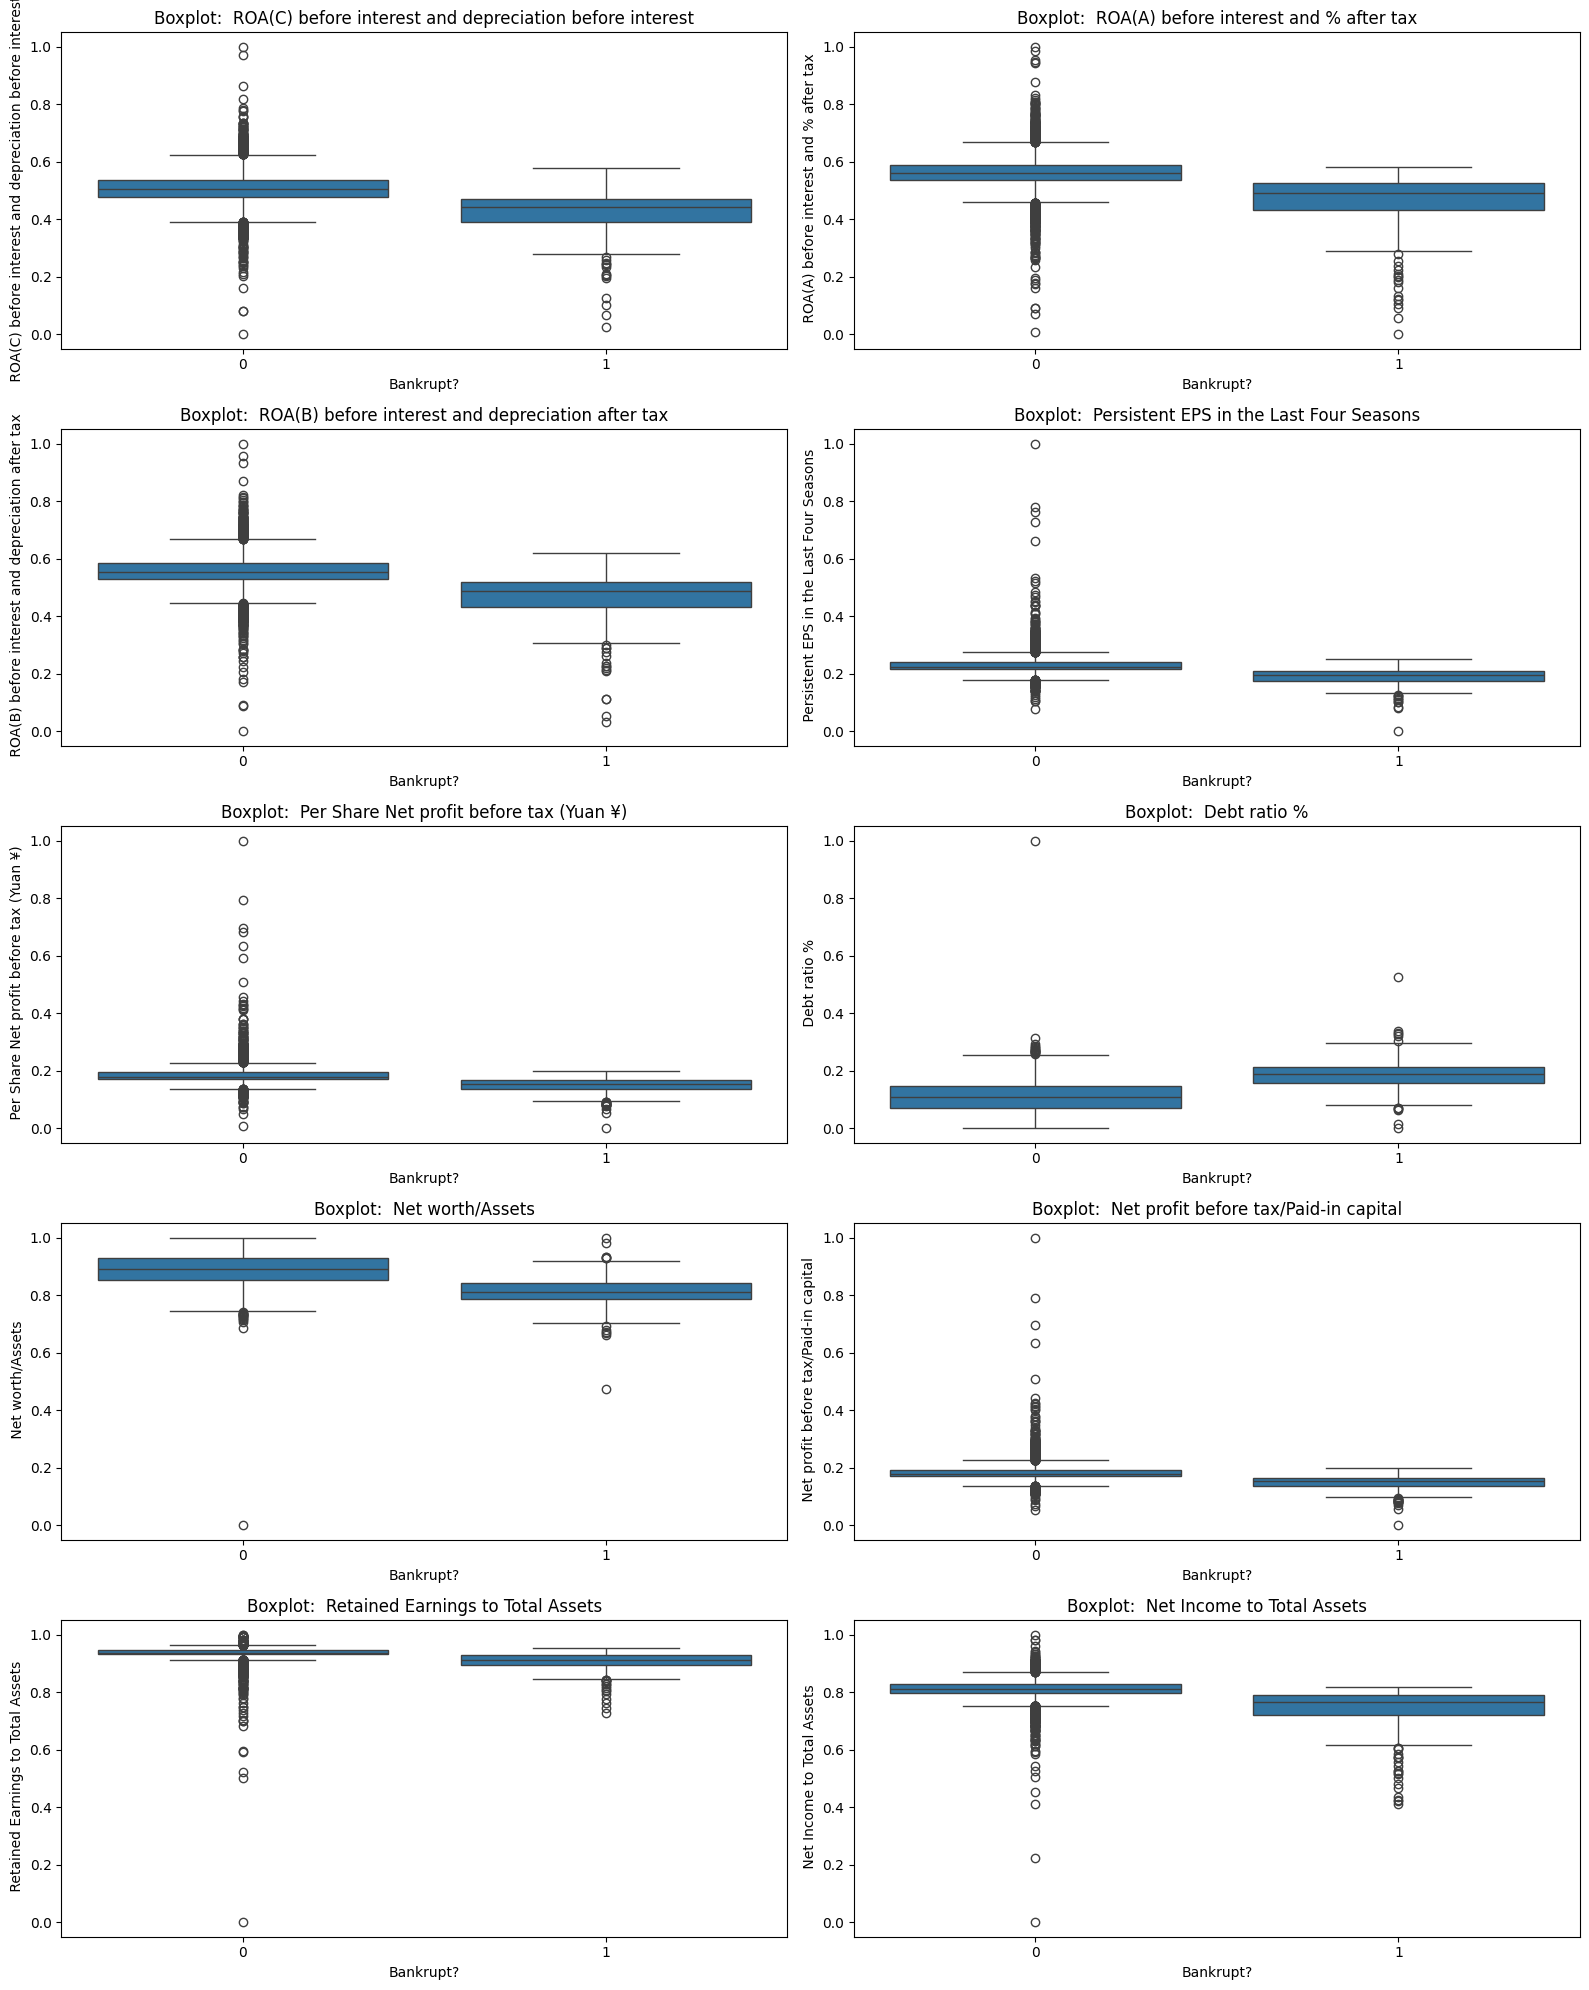

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

features = [
    ' ROA(C) before interest and depreciation before interest',
    ' ROA(A) before interest and % after tax',
    ' ROA(B) before interest and depreciation after tax',
    ' Persistent EPS in the Last Four Seasons',
    ' Per Share Net profit before tax (Yuan ¥)',
    ' Debt ratio %',
    ' Net worth/Assets',
    ' Net profit before tax/Paid-in capital',
    ' Retained Earnings to Total Assets',
    ' Net Income to Total Assets'
]

plt.figure(figsize=(16, 20))
for i, col in enumerate(features):
    plt.subplot(5, 2, i + 1)
    sns.boxplot(x= 'Bankrupt?' , y = col, data = bankruptcy_data)
    plt.title(f'Boxplot: {col}')
    plt.tight_layout()


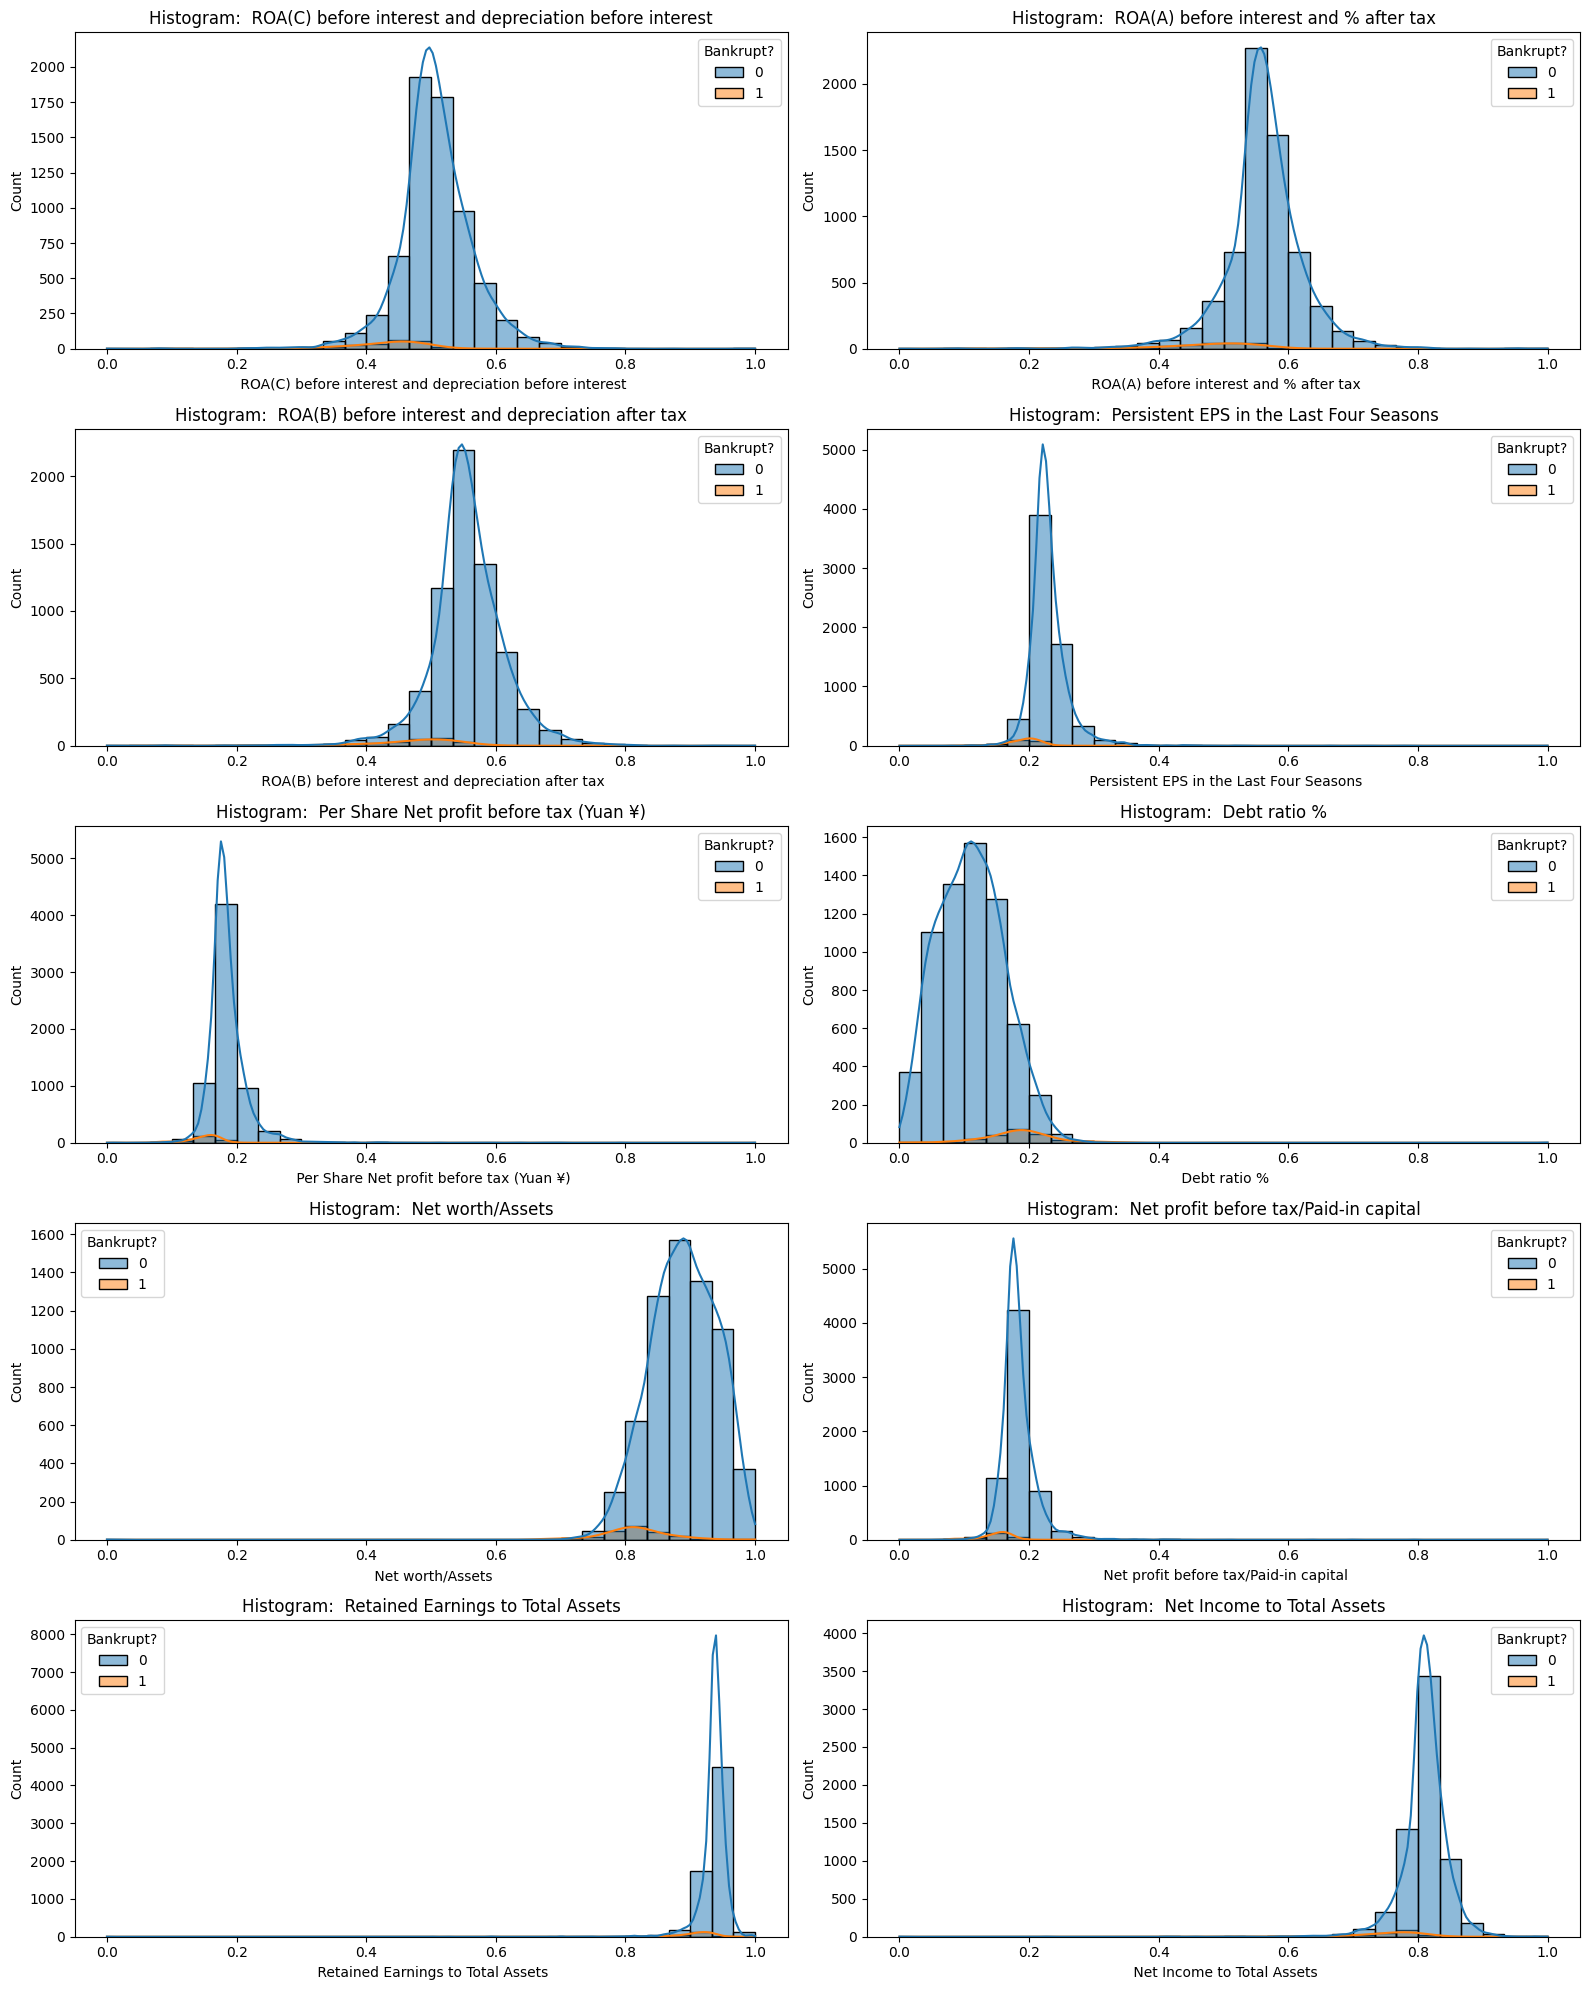

In [ ]:
plt.figure(figsize=(16, 20))
for i, col in enumerate(features):
    plt.subplot(5, 2, i + 1)
    sns.histplot(data=bankruptcy_data, x=col, hue='Bankrupt?', kde=True, bins=30)
    plt.title(f'Histogram: {col}')
    plt.tight_layout()

<Axes: xlabel=' ROA(C) before interest and depreciation before interest', ylabel=' Persistent EPS in the Last Four Seasons'>

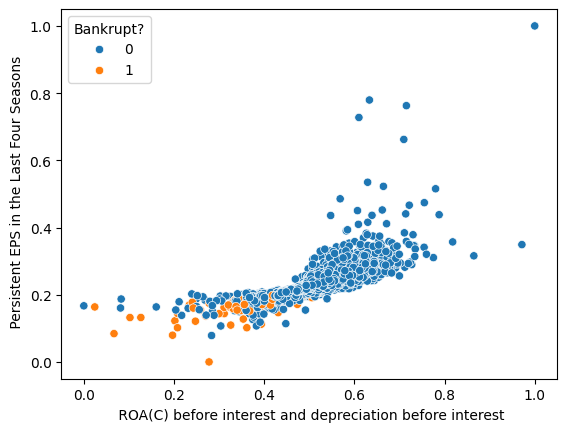

In [ ]:
sns.scatterplot(x= ' ROA(C) before interest and depreciation before interest', y = ' Persistent EPS in the Last Four Seasons', hue = 'Bankrupt?', data = bankruptcy_data)

<Axes: xlabel=' Net Income to Total Assets', ylabel=' Retained Earnings to Total Assets'>

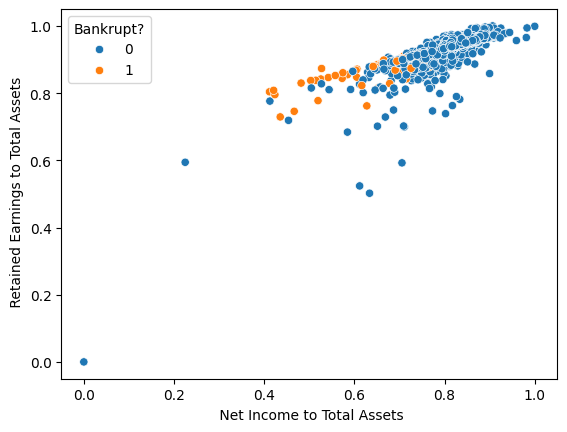

In [ ]:
sns.scatterplot(x = ' Net Income to Total Assets',y = ' Retained Earnings to Total Assets', hue = 'Bankrupt?', data = bankruptcy_data)

<Axes: xlabel=' Net Income to Total Assets', ylabel=' ROA(B) before interest and depreciation after tax'>

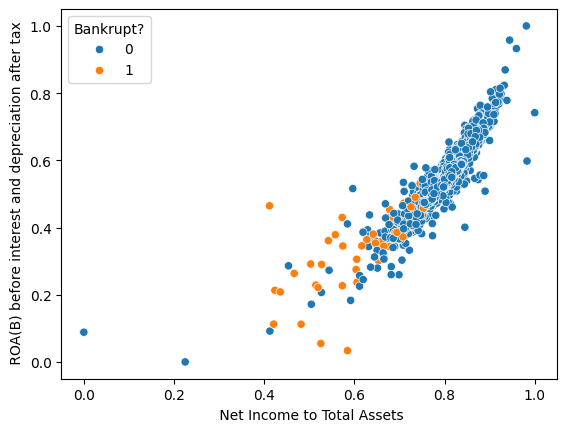

In [ ]:
sns.scatterplot(x = ' Net Income to Total Assets',y = ' ROA(B) before interest and depreciation after tax', hue = 'Bankrupt?', data = bankruptcy_data)

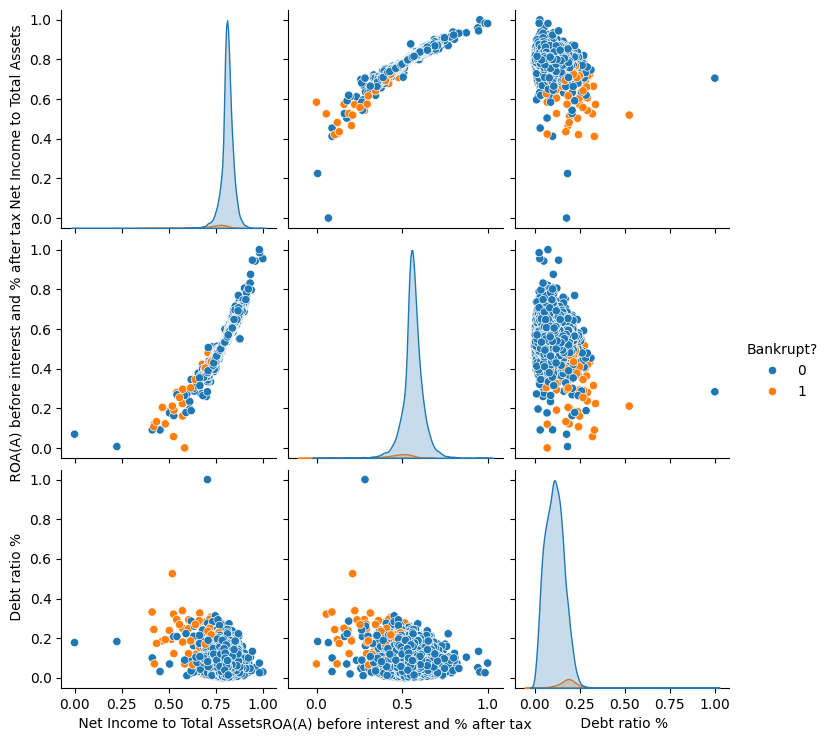

In [ ]:
selected = [' Net Income to Total Assets', ' ROA(A) before interest and % after tax',
            ' Debt ratio %', 'Bankrupt?']

sns.pairplot(bankruptcy_data[selected], hue='Bankrupt?')

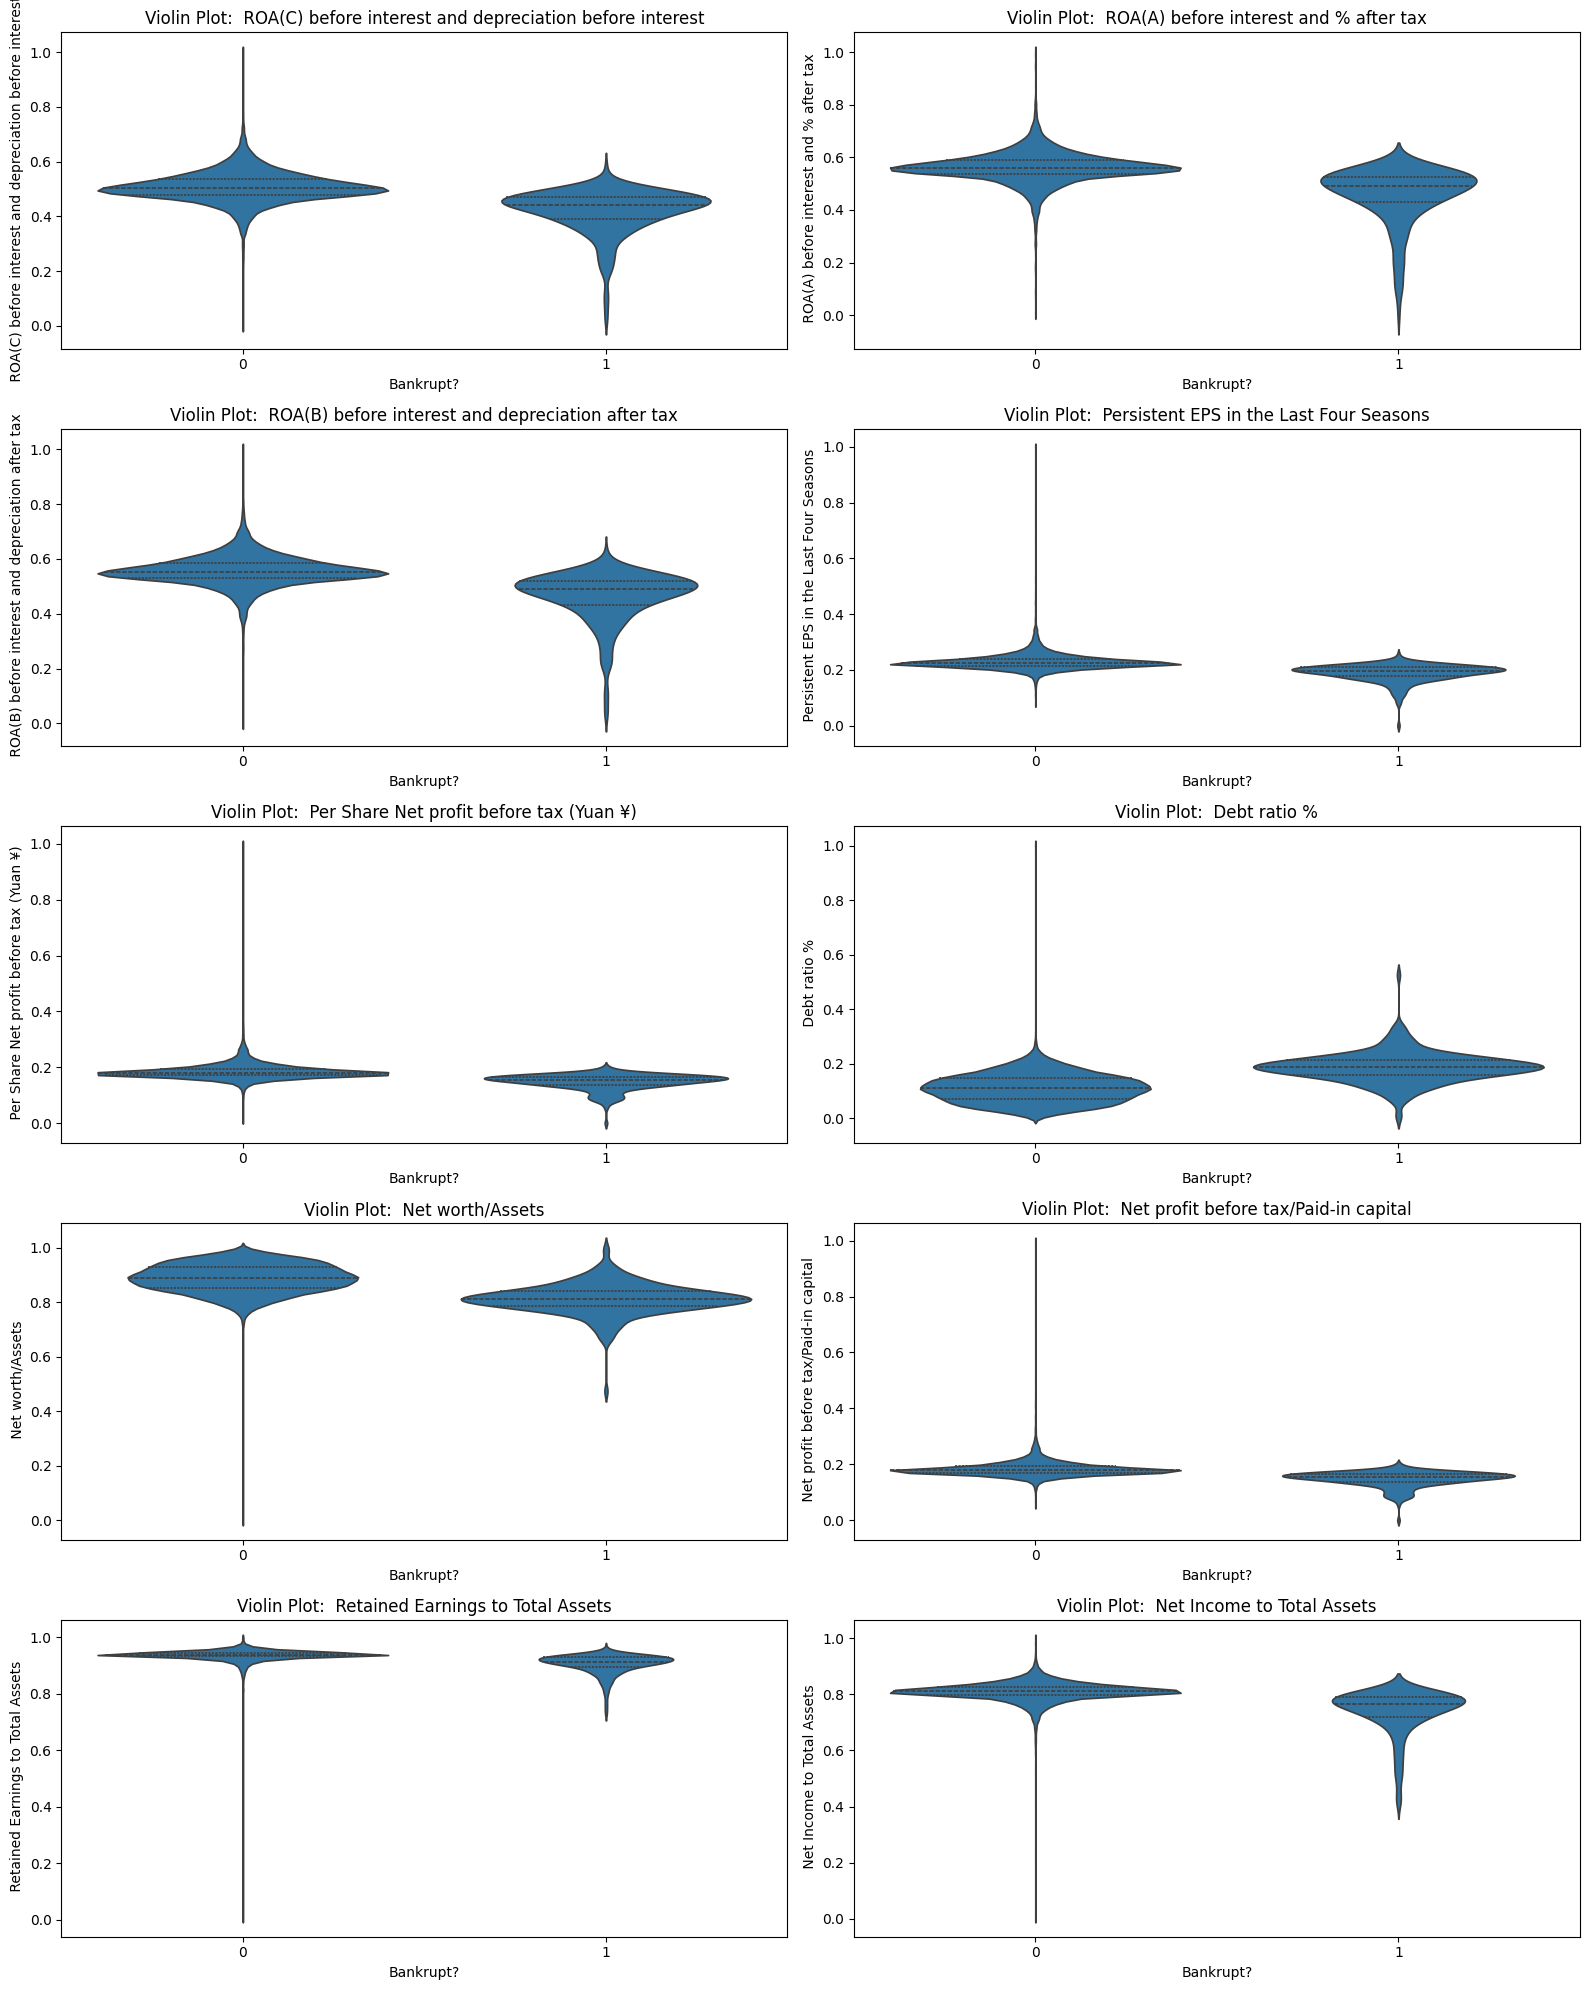

In [ ]:
plt.figure(figsize=(16, 20))
for i, col in enumerate(features):
    plt.subplot(5, 2, i + 1)
    sns.violinplot(x='Bankrupt?', y=col, data=bankruptcy_data, inner='quartile')
    plt.title(f'Violin Plot: {col}')
    plt.tight_layout()

In [ ]:
feature_names = [
    ' ROA(C) before interest and depreciation before interest',
    ' ROA(A) before interest and % after tax',
    ' ROA(B) before interest and depreciation after tax',
    ' Persistent EPS in the Last Four Seasons',
    ' Per Share Net profit before tax (Yuan ¥)',
    ' Debt ratio %',
    ' Net worth/Assets',
    ' Net profit before tax/Paid-in capital',
    ' Retained Earnings to Total Assets',
    ' Net Income to Total Assets'
]

In [ ]:
from sklearn.metrics import accuracy_score

lr_results = {}
for feature in feature_names:
    X = bankruptcy_data[[feature]]
    y = bankruptcy_data['Bankrupt?']

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10)

    lr = LogisticRegression()
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)

    accuracy = round(accuracy_score(y_test, y_pred), 3)
    lr_results[feature] = accuracy

for feature, accuracy in lr_results.items():
    print("Feature:", feature, "Accuracy:", accuracy)

Feature:  ROA(C) before interest and depreciation before interest Accuracy: 0.965
Feature:  ROA(A) before interest and % after tax Accuracy: 0.965
Feature:  ROA(B) before interest and depreciation after tax Accuracy: 0.965
Feature:  Persistent EPS in the Last Four Seasons Accuracy: 0.965
Feature:  Per Share Net profit before tax (Yuan ¥) Accuracy: 0.965
Feature:  Debt ratio % Accuracy: 0.964
Feature:  Net worth/Assets Accuracy: 0.964
Feature:  Net profit before tax/Paid-in capital Accuracy: 0.965
Feature:  Retained Earnings to Total Assets Accuracy: 0.965
Feature:  Net Income to Total Assets Accuracy: 0.965


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
X = bankruptcy_data[[' ROA(C) before interest and depreciation before interest',
                     ' ROA(A) before interest and % after tax', ' ROA(B) before interest and depreciation after tax',
                     ' ROA(B) before interest and depreciation after tax',
                     ' Persistent EPS in the Last Four Seasons',
                     ' Per Share Net profit before tax (Yuan ¥)',
                     ' Net profit before tax/Paid-in capital',
                     ' Retained Earnings to Total Assets',
                     ' Net Income to Total Assets'
                     ]]
y = bankruptcy_data['Bankrupt?']

In [ ]:
params = {'n_neighbors': range(1, 23, 2)}
knn = KNeighborsClassifier()

In [ ]:
grid = GridSearchCV(knn, param_grid = params)

In [ ]:
grid.fit(X, y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 23, 2)})

In [ ]:
grid.score(X, y)

0.9689103974189764

In [ ]:
# find baseline accuracy here
baseline = bankruptcy_data['Bankrupt?'].value_counts(normalize=True)
print(baseline)

Bankrupt?
0    0.967737
1    0.032263
Name: proportion, dtype: float64


In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

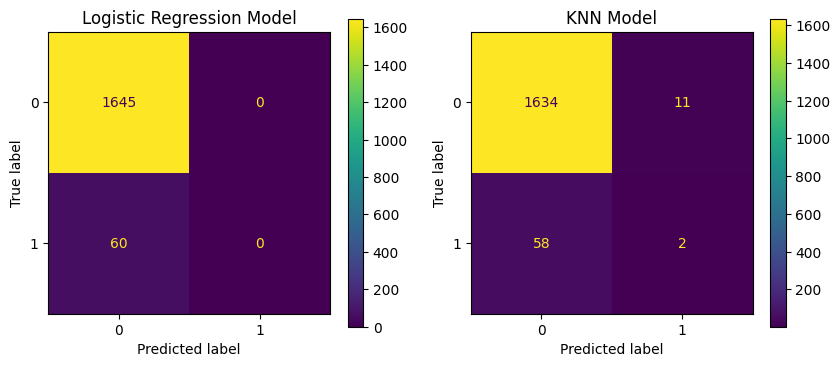

In [ ]:
log_model = LogisticRegression()
knn_model = KNeighborsClassifier(n_neighbors=3)

log_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)

fig, ax = plt.subplots(1, 2, figsize=(10, 4))

ConfusionMatrixDisplay.from_estimator(log_model, X_test, y_test, ax=ax[0])
ax[0].set_title("Logistic Regression Model")

ConfusionMatrixDisplay.from_estimator(knn_model, X_test, y_test, ax=ax[1])
ax[1].set_title("KNN Model")

plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))  # for each model

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1645
           1       0.00      0.00      0.00        60

    accuracy                           0.96      1705
   macro avg       0.48      0.50      0.49      1705
weighted avg       0.93      0.96      0.95      1705



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import Pipeline as ImbPipeline

selected_features = [
    ' ROA(C) before interest and depreciation before interest',
    ' ROA(A) before interest and % after tax',
    ' ROA(B) before interest and depreciation after tax',
    ' Persistent EPS in the Last Four Seasons',
    ' Per Share Net profit before tax (Yuan ¥)',
    ' Debt ratio %',
    ' Net worth/Assets',
    ' Net profit before tax/Paid-in capital',
    ' Retained Earnings to Total Assets',
    ' Net Income to Total Assets'
]

X = bankruptcy_data[selected_features]
y = bankruptcy_data['Bankrupt?']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

pipeline = ImbPipeline(steps=[
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('rf', RandomForestClassifier(random_state=42, class_weight='balanced'))
])

param_grid = {
    'rf__n_estimators': [100, 200],
    'rf__max_depth': [5, 10, None],
    'rf__min_samples_split': [2, 5]
}

grid = GridSearchCV(pipeline, param_grid, scoring='f1', cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
y_probs = best_model.predict_proba(X_test)[:, 1]

print('Best Parameters:', grid.best_params_)
print('Classification Report:', classification_report(y_test, y_pred))
print('ROC AUC Score:', roc_auc_score(y_test, y_probs))
print('Confusion Matrix:', confusion_matrix(y_test, y_pred))

Best Parameters: {'rf__max_depth': 10, 'rf__min_samples_split': 5, 'rf__n_estimators': 200}
Classification Report:               precision    recall  f1-score   support

           0       0.99      0.92      0.95      1320
           1       0.24      0.75      0.36        44

    accuracy                           0.92      1364
   macro avg       0.62      0.84      0.66      1364
weighted avg       0.97      0.92      0.94      1364

ROC AUC Score: 0.9215909090909091
Confusion Matrix: [[1216  104]
 [  11   33]]


In [ ]:
y_baseline = [0] * len(y_test)
print("Baseline AUC (always 0):", roc_auc_score(y_test, y_baseline))

Baseline AUC (always 0): 0.5
